In [76]:
import numpy as np
import matplotlib.pyplot as plt

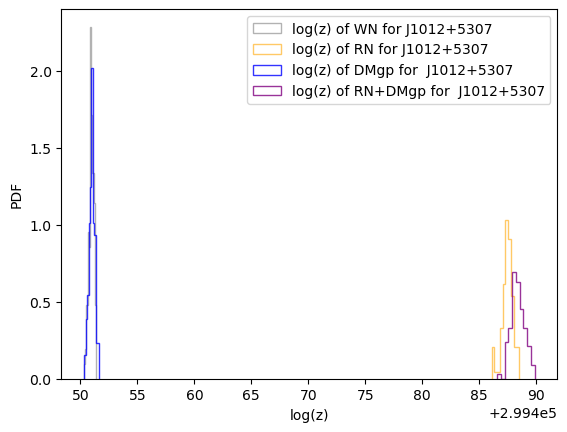

log_z realisation mean:299488.3820797799 , std:0.6118824148883402
1000 log_BF realisation mean:36.51514038631174 , std:0.5477726864718697
1000 log_BF realisation mean:37.46407509782637 , std:0.627459346860445
2*log10_BF from 1000 realisation: 31.71664795139553


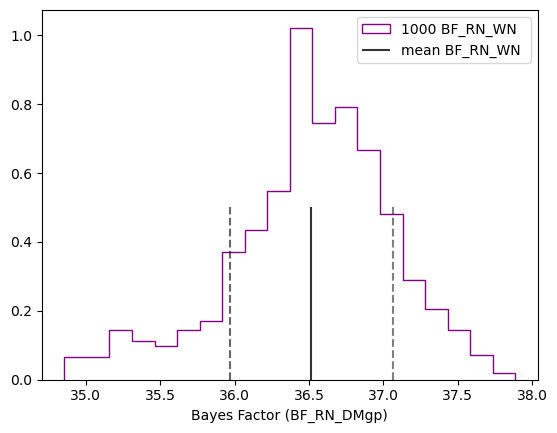

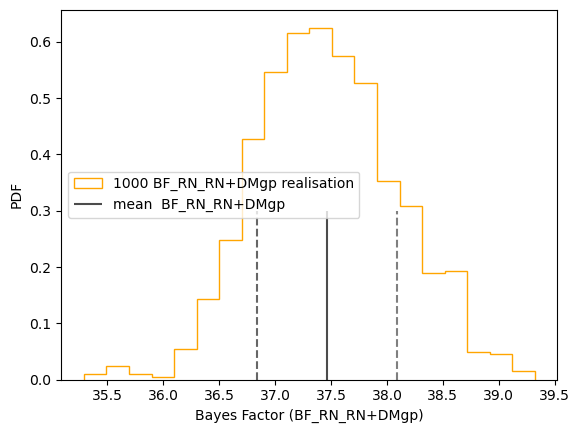

In [77]:
plt.rcParams['figure.dpi'] = 100
nbin = 10

J1012_5307_wn = np.genfromtxt('../paper_results/J1012+5307_wn_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1012_5307_rn = np.genfromtxt('../paper_results/J1012+5307_rn_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1012_5307_dmgp = np.genfromtxt('../paper_results/J1012+5307_dmgp_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1012_5307_rn_dmgp = np.genfromtxt('../paper_results/J1012+5307_rn_dmgp_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)



plt.hist(J1012_5307_wn,alpha=0.6,bins= nbin,density=True,histtype='step',color='grey',label='log(z) of WN for J1012+5307')
plt.hist(J1012_5307_rn,alpha=0.6,bins= nbin,density=True,histtype='step',color='orange',label='log(z) of RN for J1012+5307')
plt.hist(J1012_5307_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='blue',label='log(z) of DMgp for  J1012+5307')
plt.hist(J1012_5307_rn_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='purple',label='log(z) of RN+DMgp for  J1012+5307')


plt.xlabel('log(z)')
plt.ylabel('PDF')
plt.legend()
plt.show()
N = 1000
BF = np.zeros(N)
BF_dm = np.zeros(N)

for i in range(N):

    rn_z = np.random.choice(J1012_5307_rn)
    wn_z = np.random.choice(J1012_5307_wn)
    BF[i] =  rn_z-wn_z 
ymax=0.5
plt.hist(BF,bins= 20,alpha=1,density=True,histtype='step',color='purple',label='1000 BF_RN_WN')
plt.vlines(np.mean(BF), ymin=0, ymax=ymax,colors='black',alpha=0.8,label='mean BF_RN_WN ') 
plt.vlines(np.mean(BF)-np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF)+np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN_DMgp)')
plt.figure()
for i in range(N):
    wn_z = np.random.choice(J1012_5307_wn)
    rndm_z = np.random.choice(J1012_5307_rn_dmgp)
    BF_dm[i] = rndm_z - wn_z
ymax=0.3
plt.hist(BF_dm,bins= 20,alpha=1,density=True,histtype='step',color='orange',label='1000 BF_RN_RN+DMgp realisation')
plt.vlines(np.mean(BF_dm), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean  BF_RN_RN+DMgp ') 
plt.vlines(np.mean(BF_dm)-np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_dm)+np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN_RN+DMgp)')
plt.ylabel('PDF')

print(f'log_z realisation mean:{np.mean(J1012_5307_rn_dmgp)} , std:{np.std(J1012_5307_rn_dmgp)}')
print(f'{N} log_BF realisation mean:{np.mean(BF)} , std:{np.std(BF)}')
print(f'{N} log_BF realisation mean:{np.mean(BF_dm)} , std:{np.std(BF_dm)}')

print('2*log10_BF from',N,'realisation:',2*np.log10(np.exp(np.mean(BF))))




IBF mean: 0.9488068068741122
IBF std: 0.8446039440693933


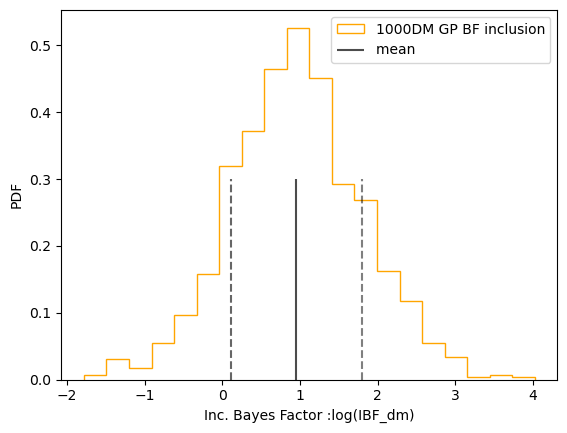

In [78]:
# IBF

N = 1000
BF_inc = np.zeros(N)
for i in range(N):
    wn_z = np.random.choice(J1012_5307_wn)
    rn_z = np.random.choice(J1012_5307_rn)
    dm_z = np.random.choice(J1012_5307_dmgp)
    rndm_z = np.random.choice(J1012_5307_rn_dmgp)

    BF_inc[i] =  (dm_z + rndm_z)-( wn_z + rn_z)
    #BF_inc = (J1012_5307_rn+J1012_5307_rn_dmgp)-(J1012_5307_wn+J1012_5307_dmgp)

plt.hist(BF_inc,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=str(len(BF_inc))+'DM GP BF inclusion')
plt.vlines(np.mean(BF_inc), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean ') 
plt.vlines(np.mean(BF_inc)-np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_inc)+np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Inc. Bayes Factor :log(IBF_dm)')
plt.ylabel('PDF')

print('IBF mean:', np.mean(BF_inc))
print('IBF std:', np.std(BF_inc))

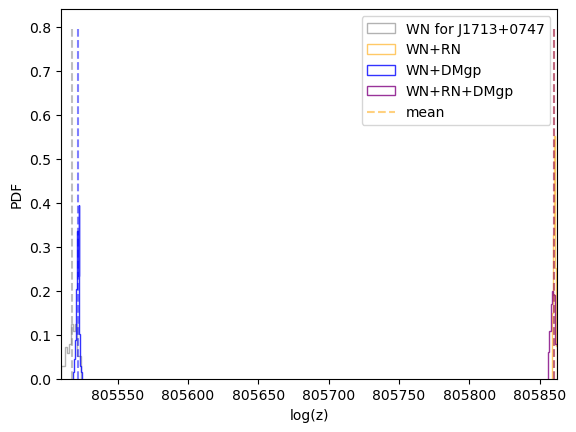

1000 log_BF_rn realisation mean:342.7663871810403 , std:3.392860286113866
1000 log_BF_rn_dm realisation mean:341.95686007582685 , std:3.793070741329339
2*log10_BF from 1000 realisation: 297.7231010692786
error on BF from 1000 realisation: 3.392860286113866


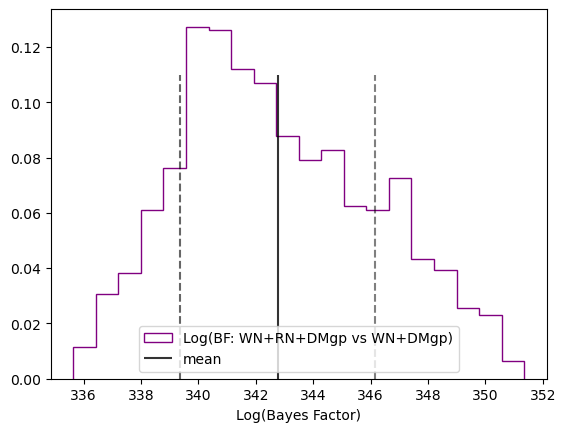

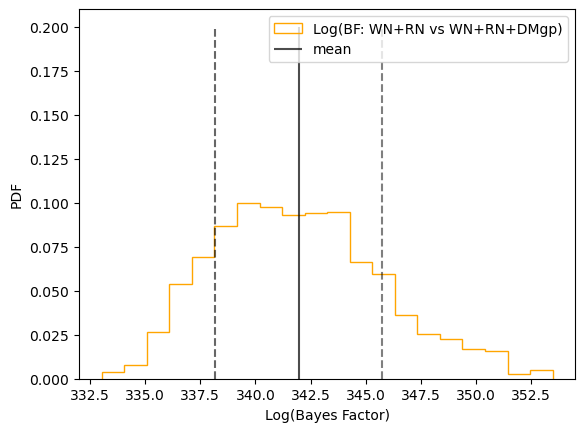

In [79]:

nbin = 10

J1713_0747_wn = np.genfromtxt('../paper_results/J1713+0747_wn_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)

J1713_0747_rn = np.genfromtxt('../paper_results/J1713+0747_rn_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1713_0747_dmgp = np.genfromtxt('../paper_results/J1713+0747_dmgp_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1713_0747_rn_dmgp = np.genfromtxt('../paper_results/J1713+0747_rn_dmgp_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)

plt.hist(J1713_0747_wn,alpha=0.6,bins= nbin,density=True,histtype='step',color='grey',label='WN for J1713+0747')
plt.hist(J1713_0747_rn,alpha=0.6,bins= nbin,density=True,histtype='step',color='orange',label='WN+RN')
plt.hist(J1713_0747_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='blue',label='WN+DMgp')
plt.hist(J1713_0747_rn_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='purple',label='WN+RN+DMgp')

ymax=0.8
plt.vlines(np.mean(J1713_0747_wn), ymin=0, ymax=ymax,linestyle='dashed',alpha=0.5,color='grey')
plt.vlines(np.mean(J1713_0747_rn), ymin=0, ymax=ymax,linestyle='dashed',alpha=0.5,color='orange',label='mean')
plt.vlines(np.mean(J1713_0747_dmgp), ymin=0, ymax=ymax,linestyle='dashed',color='blue',alpha=0.5)#,label='mean log(z) DMgp ')
plt.vlines(np.mean(J1713_0747_rn_dmgp), ymin=0, ymax=ymax,linestyle='dashed',color='purple',alpha=0.5)#,label='mean log(z) RN+DMgp ')
plt.xlabel('log(z)')
plt.xlim(min(J1713_0747_wn),max(J1713_0747_rn))
plt.ylabel('PDF')
plt.legend()
plt.show()
N = 1000
BF = np.zeros(N)
BF_dm = np.zeros(N)

for i in range(N):

    rn_z = np.random.choice(J1713_0747_rn)
    wn = np.random.choice(J1713_0747_wn)
    BF[i] =  rn_z-wn
ymax=0.11
plt.hist(BF,bins= 20,alpha=1,density=True,histtype='step',color='purple',label='Log(BF: WN+RN+DMgp vs WN+DMgp)')
plt.vlines(np.mean(BF), ymin=0, ymax=ymax,colors='black',alpha=0.8,label='mean') 
plt.vlines(np.mean(BF)-np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF)+np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Log(Bayes Factor)')
plt.figure()
for i in range(N):
    wn_z = np.random.choice(J1713_0747_wn)
    rndm_z = np.random.choice(J1713_0747_rn_dmgp)
    BF_dm[i] = rndm_z - wn_z
ymax=0.2
plt.hist(BF_dm,bins= 20,alpha=1,density=True,histtype='step',color='orange',label='Log(BF: WN+RN vs WN+RN+DMgp)')
plt.vlines(np.mean(BF_dm), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean') 
plt.vlines(np.mean(BF_dm)-np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_dm)+np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Log(Bayes Factor)')
plt.ylabel('PDF')
print(f'{N} log_BF_rn realisation mean:{np.mean(BF)} , std:{np.std(BF)}')
print(f'{N} log_BF_rn_dm realisation mean:{np.mean(BF_dm)} , std:{np.std(BF_dm)}')

print('2*log10_BF from',N,'realisation:',2*np.log10(np.exp(np.mean(BF))))
print('error on BF from',N,'realisation:',np.std(BF))



In [80]:
print(f'log_z realisation mean:{np.mean(J1713_0747_rn_dmgp)} , std:{np.std(J1713_0747_rn_dmgp)}')

log_z realisation mean:805859.7849872092 , std:2.1397467026818053


IBF mean: 681.2469007664306
IBF std: 4.179820735799044


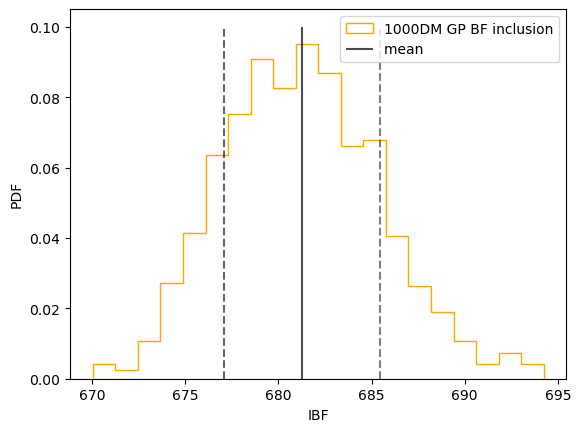

In [81]:
N = 1000
BF_inc = np.zeros(N)
for i in range(N):
    wn_z = np.random.choice(J1713_0747_wn)
    rn_z = np.random.choice(J1713_0747_rn)
    dm_z = np.random.choice(J1713_0747_dmgp)
    rndm_z = np.random.choice(J1713_0747_rn_dmgp)

    BF_inc[i] =  (rn_z + rndm_z)-( wn_z + dm_z)
    #BF_inc = (J1713_0747_rn+J1713_0747_rn_dmgp)-(J1713_0747_wn+J1713_0747_dmgp)
ymax =0.10
plt.hist(BF_inc,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=str(len(BF_inc))+'DM GP BF inclusion')
plt.vlines(np.mean(BF_inc), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean ') 
plt.vlines(np.mean(BF_inc)-np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_inc)+np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('IBF')
plt.ylabel('PDF')

print('IBF mean:', np.mean(BF_inc))
print('IBF std:', np.std(BF_inc))

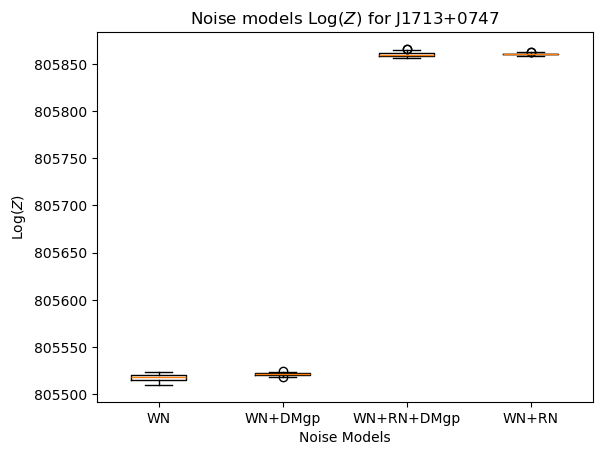

100

In [82]:
# Combine all vectors into a list
data = [J1713_0747_wn,J1713_0747_dmgp ,J1713_0747_rn_dmgp,J1713_0747_rn]

# Create a box plot
plt.boxplot(data)

# Set x-labels
plt.xticks([1, 2, 3, 4], ['WN', 'WN+DMgp','WN+RN+DMgp', 'WN+RN'])

# Set labels and title
plt.xlabel('Noise Models')
plt.ylabel('Log($Z$)')
plt.title('Noise models Log($Z$) for J1713+0747')

# Display the plot
plt.show()
len(J1713_0747_dmgp)

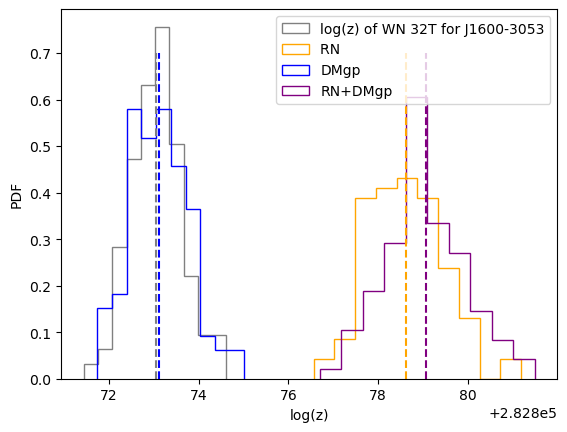

log_z realisation mean:282879.06407934317 , std:0.8776216570598105
5000 log_BF_rn realisation mean:5.536960883239284 , std:1.0132887373568273
5000 log_BF_rn_dm realisation mean:6.00152613582114 , std:1.0499087037749877
2*log10_BF from 5000 realisation: 4.809343116209953


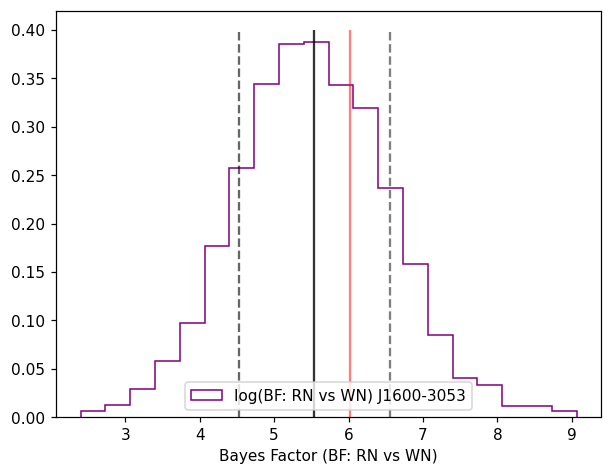

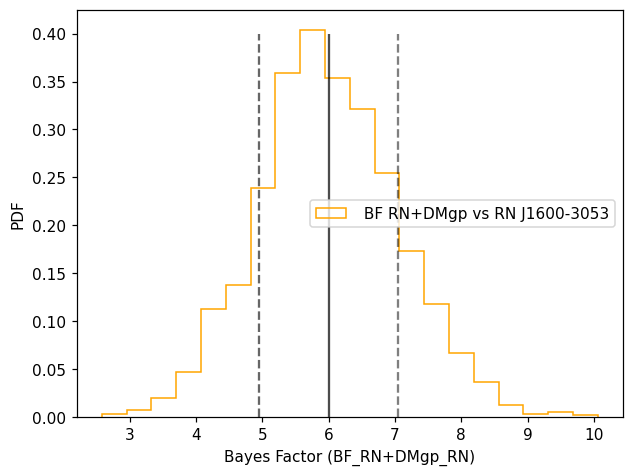

In [83]:
nbin = 10

J1600_3053_rn = np.genfromtxt('../paper_results/J1600-3053_rn_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1600_3053_dmgp = np.genfromtxt('../paper_results/J1600-3053_dmgp_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1600_3053_rn_dmgp = np.genfromtxt('../paper_results/J1600-3053_rn_dmgp_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1600_3053_wn = np.genfromtxt('../paper_results/J1600-3053_wn_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)


plt.hist(J1600_3053_wn,alpha=1,bins= nbin,density=True,histtype='step',color='grey',label='log(z) of WN 32T for J1600-3053')

#plt.hist(J1600_3053_rn,alpha=0.5,bins= nbin,density=True,histtype='step',color='orange',label='log(z) of RN 16T for J1600-3053')
plt.hist(J1600_3053_rn,alpha=1,bins= nbin,density=True,histtype='step',color='orange',label='RN ')

#plt.hist(J1600_3053_dmgp ,alpha=0.5,bins= nbin,histtype='step',density=True,color='blue',label='log(z) of DMgp  for  J1600-3053')
plt.hist(J1600_3053_dmgp ,alpha=1,bins= nbin,histtype='step',density=True,color='blue',label='DMgp')

#plt.hist(J1600_3053_rn_dmgp ,alpha=0.5,bins= nbin,histtype='step',density=True,color='purple',label='log(z) of RN+DMgp for J1600-3053')
plt.hist(J1600_3053_rn_dmgp ,alpha=1,bins= nbin,histtype='step',density=True,color='purple',label='RN+DMgp')
ymax = 0.7

plt.vlines(np.mean(J1600_3053_wn), ymin=0, ymax=ymax,linestyle='dashed',alpha=1,color='grey')
plt.vlines(np.mean(J1600_3053_rn), ymin=0, ymax=ymax,linestyle='dashed',alpha=1,color='orange')
plt.vlines(np.mean(J1600_3053_dmgp), ymin=0, ymax=ymax,linestyle='dashed',color='blue',alpha=1)
plt.vlines(np.mean(J1600_3053_rn_dmgp), ymin=0, ymax=ymax,linestyle='dashed',color='purple',alpha=1)
plt.xlabel('log(z)')
plt.ylabel('PDF')
plt.legend()
plt.show()
plt.rcParams['figure.dpi'] = 110
N = 5000
BF = np.zeros(N)
BF_dm = np.zeros(N)

for i in range(N):
    rn_z = np.random.choice(J1600_3053_rn)
    wn_z = np.random.choice(J1600_3053_wn)
    BF[i] =  rn_z-wn_z 
ymax=0.4
plt.hist(BF,bins= 20,alpha=1,density=True,histtype='step',color='purple',label='log(BF: RN vs WN) J1600-3053')
plt.vlines(np.mean(BF2), ymin=0, ymax=ymax,colors='red',alpha=0.5)#,label='mean (BF_RN+DMgp_DMgp ') 
plt.vlines(np.mean(BF), ymin=0, ymax=ymax,colors='black',alpha=0.8)#,label='mean (BF_RN+DMgp_DMgp ') 
plt.vlines(np.mean(BF)-np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF)+np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF: RN vs WN)')
plt.figure()
for i in range(N):
    wn_z = np.random.choice(J1600_3053_wn)
    rndm_z = np.random.choice(J1600_3053_rn_dmgp)
    BF_dm[i] =  rndm_z - wn_z 
ymax=0.4
plt.hist(BF_dm,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=' BF RN+DMgp vs RN J1600-3053')
plt.vlines(np.mean(BF_dm), ymin=0, ymax=ymax,colors='black',alpha=0.7)#,label='mean  BF_RN_RN+DMgp ') 
plt.vlines(np.mean(BF_dm)-np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_dm)+np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN+DMgp_RN)')
plt.ylabel('PDF')
print(f'log_z realisation mean:{np.mean(J1600_3053_rn_dmgp)} , std:{np.std(J1600_3053_rn_dmgp)}')
print(f'{N} log_BF_rn realisation mean:{np.mean(BF)} , std:{np.std(BF)}')
print(f'{N} log_BF_rn_dm realisation mean:{np.mean(BF_dm)} , std:{np.std(BF_dm)}')
print('2*log10_BF from',N,'realisation:',2*np.log10(np.exp(np.mean(BF))))



IBF mean: 11.423697563353693
IBF std: 1.4663367302572194


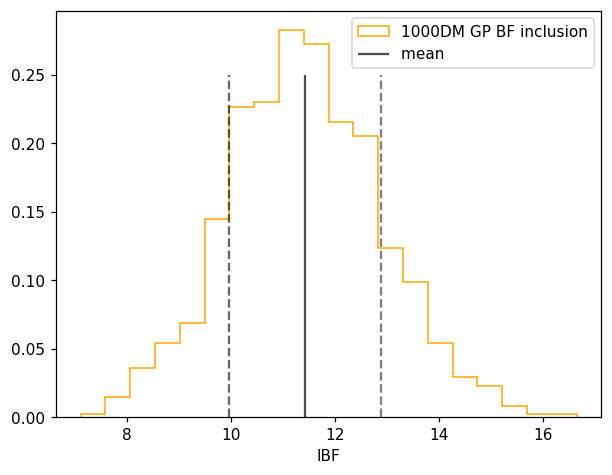

In [84]:
N = 1000
BF_inc = np.zeros(N)
for i in range(N):
    wn_z = np.random.choice(J1600_3053_wn)
    rn_z = np.random.choice(J1600_3053_rn)
    dm_z = np.random.choice(J1600_3053_dmgp)
    rndm_z = np.random.choice(J1600_3053_rn_dmgp)

    BF_inc[i] =  (rn_z + rndm_z)-( wn_z + dm_z)
    #BF_inc = (J1600_3053_rn+J1600_3053_rn_dmgp)-(J1600_3053_wn+J1600_3053_dmgp)
ymax =0.25
plt.hist(BF_inc,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=str(len(BF_inc))+'DM GP BF inclusion')
plt.vlines(np.mean(BF_inc), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean ') 
plt.vlines(np.mean(BF_inc)-np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_inc)+np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('IBF')
print('IBF mean:', np.mean(BF_inc))
print('IBF std:', np.std(BF_inc))

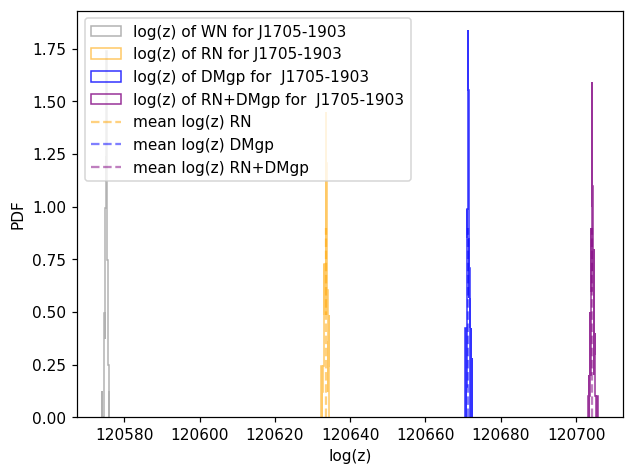

log_z realisation mean:120704.32171887477 , std:0.41363651494764486
1000 log_BF_rn realisation mean:58.22457131524201 , std:0.5397613306942931
1000 log_BF_rn_dm realisation mean:129.07384698427057 , std:0.500941747826354
2*log10_BF from 1000 realisation: 50.57322006678393


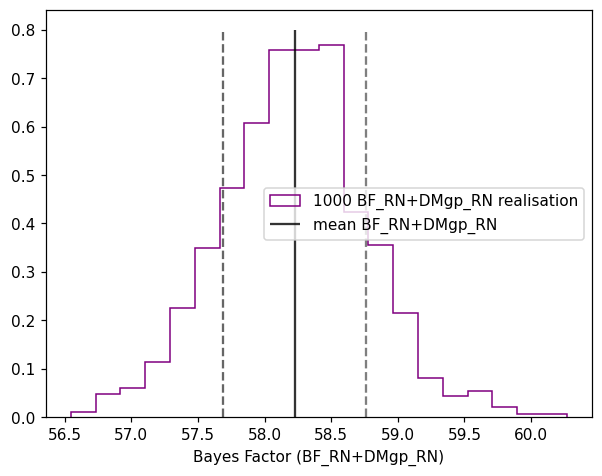

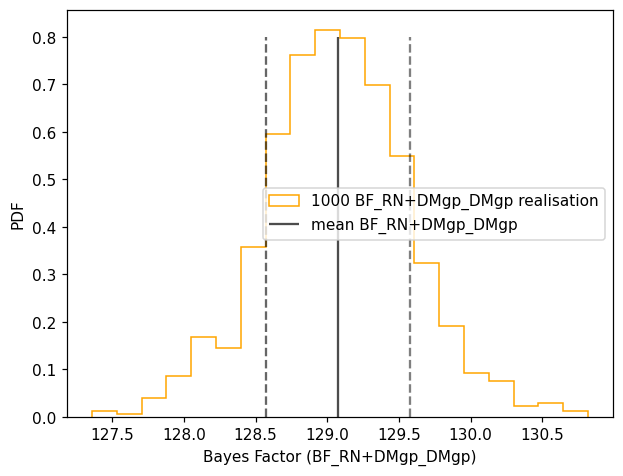

In [85]:
nbin = 25
J1705_1903_wn = np.genfromtxt('../paper_results/J1705-1903_wn_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1705_1903_rn = np.genfromtxt('../paper_results/J1705-1903_rn_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)

#J1705_1903_rn = np.genfromtxt('./single_pulsar/gss/J1705-1903_rn_log_z_200kpost_500_16T_500_100s.txt',dtype=float,unpack=True)
J1705_1903_dmgp = np.genfromtxt('../paper_results/J1705-1903_dmgp_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)
J1705_1903_rn_dmgp = np.genfromtxt('../paper_results/J1705-1903_rn_dmgp_1000s_tf100_100log_z_8T.txt',dtype=float,unpack=True)

plt.hist(J1705_1903_wn,alpha=0.6,bins= nbin,density=True,histtype='step',color='grey',label='log(z) of WN for J1705-1903')
plt.hist(J1705_1903_rn,alpha=0.6,bins= nbin,density=True,histtype='step',color='orange',label='log(z) of RN for J1705-1903')
plt.hist(J1705_1903_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='blue',label='log(z) of DMgp for  J1705-1903')
plt.hist(J1705_1903_rn_dmgp ,alpha=0.8,bins= nbin,histtype='step',density=True,color='purple',label='log(z) of RN+DMgp for  J1705-1903')


plt.vlines(np.mean(J1705_1903_rn), ymin=0, ymax=0.9,linestyle='dashed',alpha=0.5,color='orange',label='mean log(z) RN ')
plt.vlines(np.mean(J1705_1903_dmgp), ymin=0, ymax=0.9,linestyle='dashed',color='blue',alpha=0.5,label='mean log(z) DMgp ')
plt.vlines(np.mean(J1705_1903_rn_dmgp), ymin=0, ymax=0.9,linestyle='dashed',color='purple',alpha=0.5,label='mean log(z) RN+DMgp ')
plt.xlabel('log(z)')
plt.ylabel('PDF')
plt.legend()
plt.show()
N = 1000
BF = np.zeros(N)
BF_dm = np.zeros(N)

for i in range(N):

    wn_z = np.random.choice(J1705_1903_wn)
    rn_z = np.random.choice(J1705_1903_rn)
    BF[i] = rn_z - wn_z
for i in range(N):
    wn_z = np.random.choice(J1705_1903_wn)
    rndm_z = np.random.choice(J1705_1903_rn_dmgp)
    BF_dm[i] = rndm_z - wn_z
ymax=0.8
plt.hist(BF,bins= 20,alpha=1,density=True,histtype='step',color='purple',label='1000 BF_RN+DMgp_RN realisation')
plt.vlines(np.mean(BF), ymin=0, ymax=ymax,colors='black',alpha=0.8,label='mean BF_RN+DMgp_RN ') 
plt.vlines(np.mean(BF)-np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF)+np.std(BF), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN+DMgp_RN)')
plt.figure()
ymax=0.8
plt.hist(BF_dm,bins= 20,alpha=1,density=True,histtype='step',color='orange',label='1000 BF_RN+DMgp_DMgp realisation')
plt.vlines(np.mean(BF_dm), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean BF_RN+DMgp_DMgp ') 
plt.vlines(np.mean(BF_dm)-np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_dm)+np.std(BF_dm), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('Bayes Factor (BF_RN+DMgp_DMgp)')
plt.ylabel('PDF')
print(f'log_z realisation mean:{np.mean(J1705_1903_rn_dmgp)} , std:{np.std(J1705_1903_rn_dmgp)}')
print(f'{N} log_BF_rn realisation mean:{np.mean(BF)} , std:{np.std(BF)}')
print(f'{N} log_BF_rn_dm realisation mean:{np.mean(BF_dm)} , std:{np.std(BF_dm)}')
print('2*log10_BF from',N,'realisation:',2*np.log10(np.exp(np.mean(BF))))


IBF mean: 91.17312403784997
IBF std: 0.7424425370305971


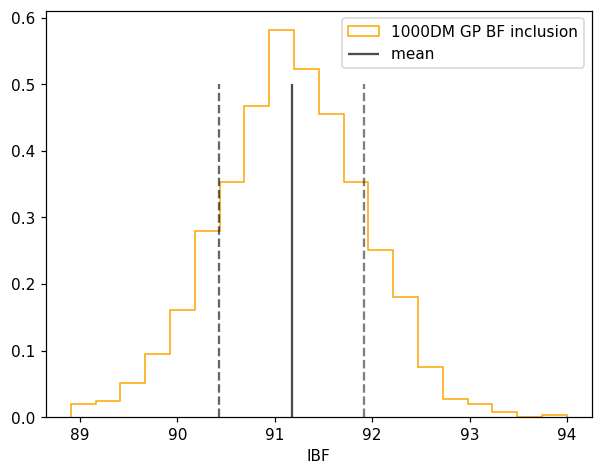

In [86]:
N = 1000
BF_inc = np.zeros(N)
for i in range(N):
    wn_z = np.random.choice(J1705_1903_wn)
    rn_z = np.random.choice(J1705_1903_rn)
    dm_z = np.random.choice(J1705_1903_dmgp)
    rndm_z = np.random.choice(J1705_1903_rn_dmgp)

    BF_inc[i] =  (rn_z + rndm_z)-( wn_z + dm_z)
    #BF_inc = (J1705_1903_rn+J1705_1903_rn_dmgp)-(J1705_1903_wn+J1705_1903_dmgp)
ymax =0.50
plt.hist(BF_inc,bins= 20,alpha=1,density=True,histtype='step',color='orange',label=str(len(BF_inc))+'DM GP BF inclusion')
plt.vlines(np.mean(BF_inc), ymin=0, ymax=ymax,colors='black',alpha=0.7,label='mean ') 
plt.vlines(np.mean(BF_inc)-np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.6)
plt.vlines(np.mean(BF_inc)+np.std(BF_inc), ymin=0, ymax=ymax,colors='black',linestyle='dashed',alpha=0.5)
plt.legend()
plt.xlabel('IBF')
print('IBF mean:', np.mean(BF_inc))
print('IBF std:', np.std(BF_inc))